In [48]:
import numpy as np
import dicom
import pandas as pd
import os
import matplotlib.pyplot as pl
from report_parser import parse_report
from PIL import Image
import tqdm

In [17]:
csv_file_path = '/crimea/mimic-cxr/mimic-cxr-map.csv'
images_path = '/crimea/mimic-cxr/_images'
reports_path = '/crimea/mimic-cxr/reports'

In [37]:
df =  pd.read_csv(csv_file_path, sep=',', header=0)
df = df.loc[df['dicom_is_available'],:]
df.reset_index()
display(df.head())

,subject_id,rad_id,dicom_id,dicom_is_available
0,70233355,52727485,3b9565f5-69ab0d33-1a9d2d1b-bb09c424-7f0243e6,True
1,70233355,52727485,8074bd10-62acdde0-3df2608b-13ca2322-09ce372c,True
2,70233355,53378012,3108d905-782ffdc0-209309e8-2413eeb4-6bfb958a,True
3,70233355,53378012,40eab5a8-31446771-08c6b024-2717a65c-41f8c74f,True
4,70233355,55587989,cef1a7ea-8c7df75c-41070128-7cdf5c89-23682e1b,True


In [41]:
image_files  = set(os.listdir(images_path))
report_files = set(os.listdir(reports_path))

print('images:  %6d' % len(image_files))
print('reports: %6d' % len(report_files))

images:   91664
reports: 206574


In [47]:
captioned = {}
for idx, row in tqdm.tqdm(df.iterrows()):
    dicom_file  = str(row['dicom_id'])+'.dcm'
    report_file = str(row['rad_id'])+'.txt'
    if (dicom_file in image_files) and (report_file in report_files):
        captioned[row['rad_id']] = (dicom_file,report_file)
        
print(len(captioned))

40027


Patient ID: 77631843
View Position: PA


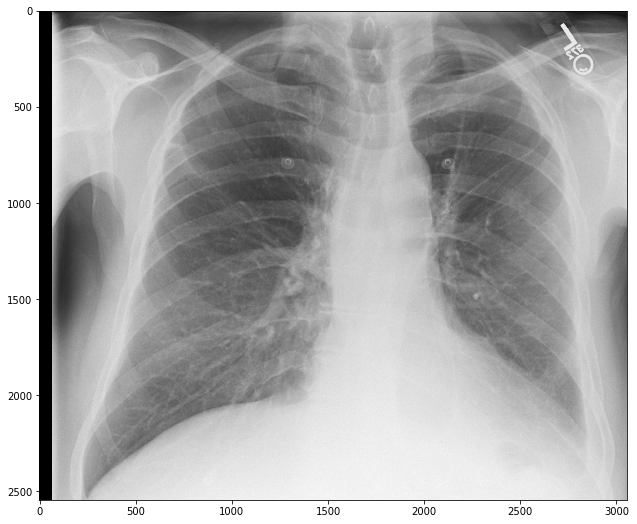

Findings: there is no focal consolidation or pneumothorax. there is a NAME left pleural effusion with underlying atelectasis, decreased since DATE. postsurgical changes in the left lung are stable. the cardiomediastinal silhouette is shifted to the left, unchanged since the prior exam and likely due to volume loss. the imaged upper abdomen is unremarkable. the bones are intact.
Patient ID: 4029
View Position: PA


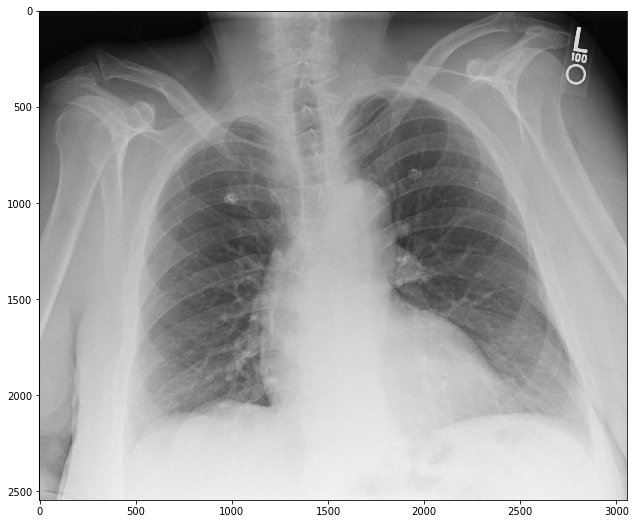

Findings: cardiomediastinal silhouette is stable. the heart is not enlarged. there is no focal consolidation, pleural effusion, or pneumothorax. no pulmonary edema. multilevel degenerative changes in the NAME are noted.
Patient ID: 73114826
View Position: PA


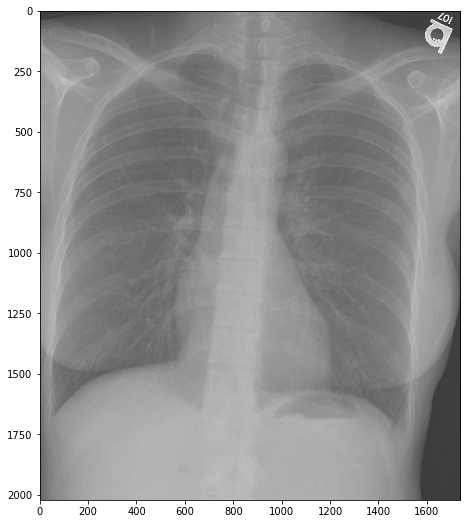

Findings: the lungs are clear without consolidation or edema. there is no pleural effusion or pneumothorax. the cardiomediastinal silhouette is normal.
Patient ID: 71581571
View Position: LATERAL


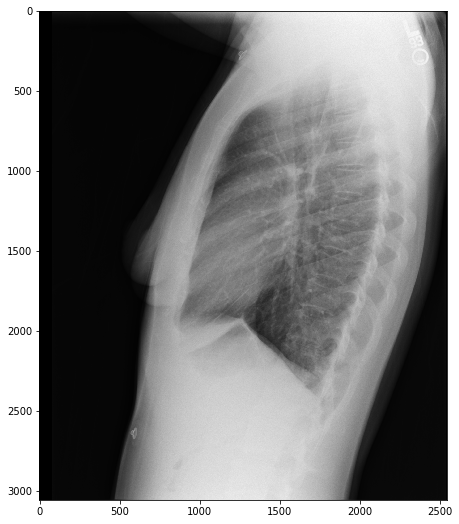

Findings: the cardiac, mediastinal and hilar contours are normal. lungs are clear. no pleural effusion or pneumothorax is seen. no acute osseous abnormalities are detected.
Patient ID: 75309451
View Position: LL


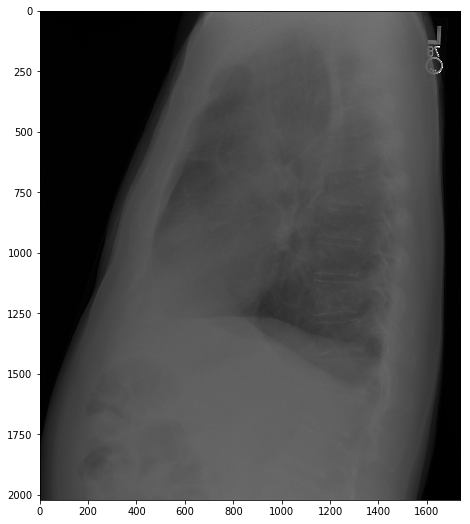

Findings: as compared to the previous radiograph, the pre-existing right upper lobe pneumonia has completely resolved. on today's image, no evidence of infection is seen. otherwise, unchanged left rib deformities and postop status. normal size of the cardiac silhouette.
Patient ID: 72476489
View Position: LATERAL


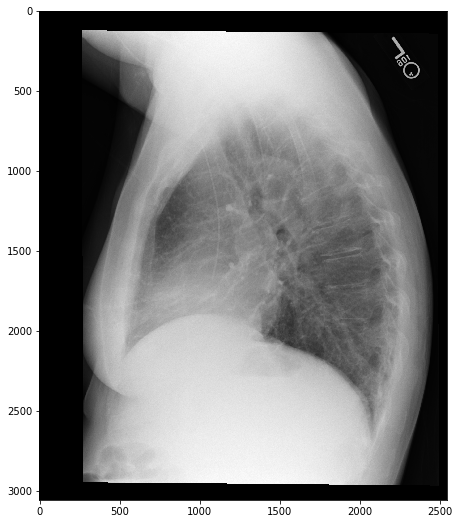

Findings: right-sided picc terminates at the junction of the svc and right atrium. heart size is normal. mediastinal and hilar contours are unremarkable. pulmonary vasculature is normal. linear opacities within the left lung base likely reflect subsegmental atelectasis. scarring within the lung apices is noted. no focal consolidation, pleural effusion or pneumothorax is present. no acute osseous abnormalities demonstrated.
Patient ID: 75389802
View Position: LATERAL


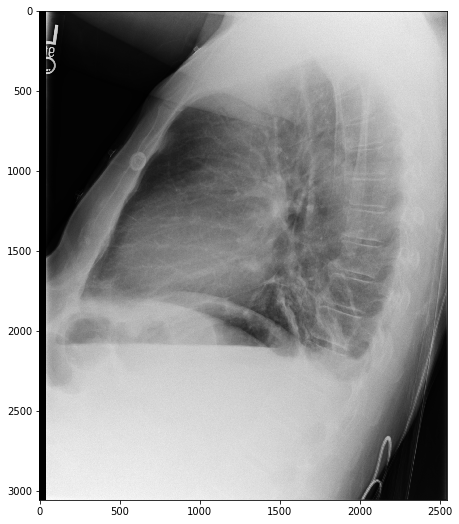

Findings: cardiac silhouette size is normal. mediastinal and hilar contours are within normal limits. pulmonary vasculature is normal. streaky linear opacities in the left lower lobe likely reflect areas of atelectasis. NAME bilateral pleural effusions are present, as seen on the previous exam. no pneumothorax is present. there are mild multilevel degenerative changes in the NAME NAME.
Patient ID: 72538751
View Position: LL


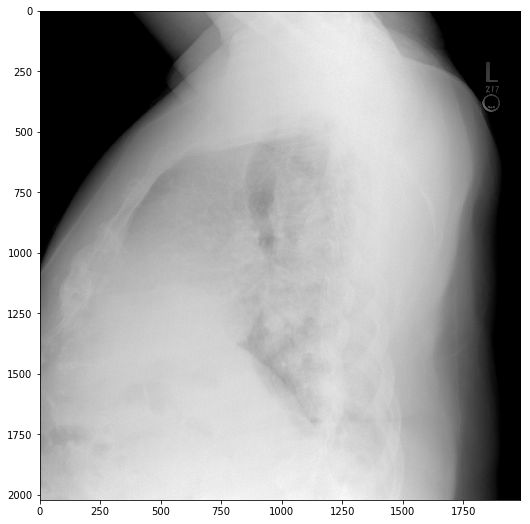

Findings:
Patient ID: 75521058
View Position: AP


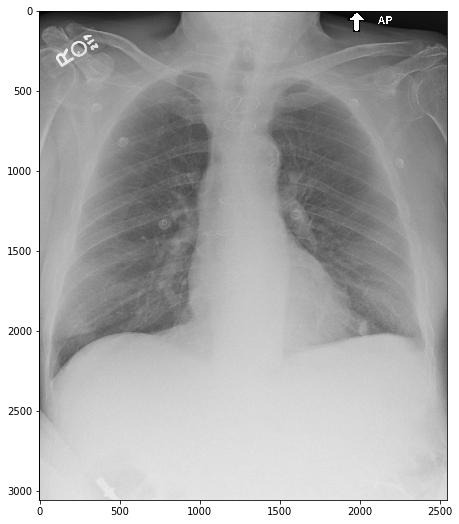

Findings:
Patient ID: 76593685
View Position: LATERAL


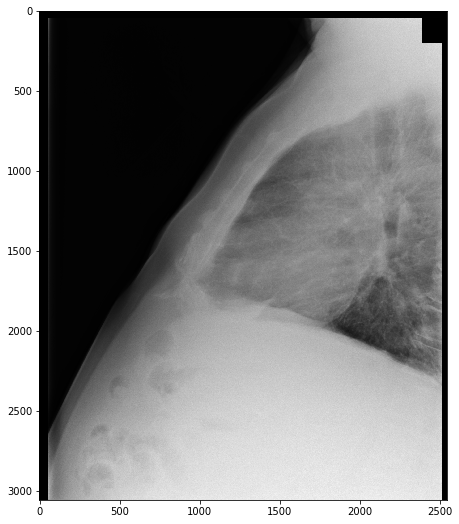

Findings: flattening of the diaphragms and prominent interstitial markings at the bases are compatible with copd. heart and mediastinal contours are normal. no consolidation, effusion, or pneumothorax is identified.
Patient ID: 47758
View Position: LATERAL


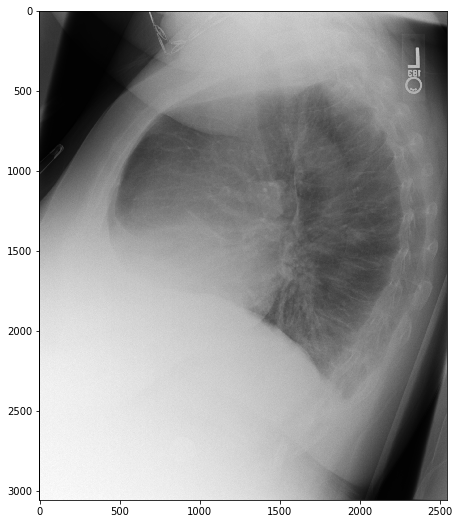

Findings:
Patient ID: 79306350
View Position: AP


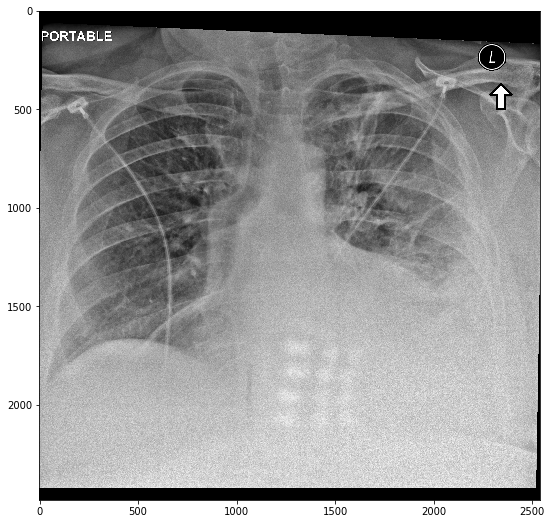

Findings:
Patient ID: 71471857
View Position: LL


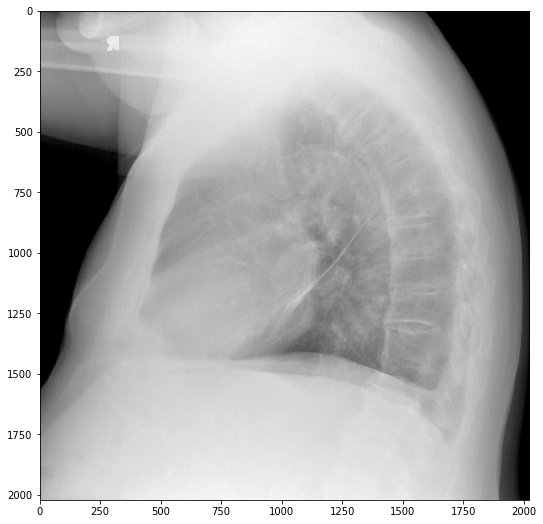

Findings: in comparison with study of DATE, there has been essentially complete clearing of the left mid zone consolidation. blunting of the left costophrenic angle persists with some apparent atelectatic changes at the left base. no evidence of pulmonary vascular congestion.
Patient ID: 98226
View Position: AP


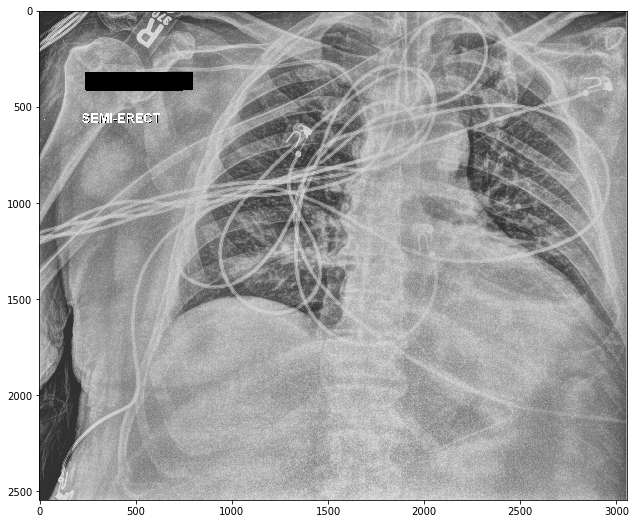

Findings: as compared to the previous radiograph, there is no relevant change. the monitoring and support devices are constant. there is unchanged appearance of the low lung volumes and the moderate retrocardiac atelectasis as well as the mildly enlarged cardiac silhouette. no larger pleural effusions. no newly appeared focal parenchymal opacities.
Patient ID: 54817
View Position: AP


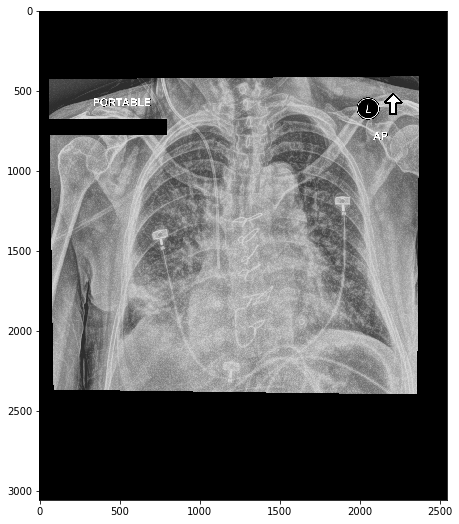

Findings: cardiac silhouette remains moderately enlarged slightly increased from prior exam. there has been interval increase in central pulmonary vascular engorgement as well as interstitial edema. a focal right lower lung consolidation has increased in severity and is worrisome for pneumonia. there is no large pleural effusion or pneumothorax. a right internal jugular central venous catheter is unchanged in position.


In [51]:
n = 15
first_n = dict(list(captioned.items())[:n])
for rad_id,(dicom_file,report_file) in first_n.items():

    dicom_path = os.path.join(images_path,dicom_file)
    plan = dicom.read_file(dicom_path, stop_before_pixels=False)
    view_position = plan.ViewPosition
    image = Image.fromarray(np.uint8(plan.pixel_array/plan.pixel_array.max()*255))
    parsed_report = parse_report(os.path.join(reports_path,report_file))

    if image != None:
        print('===================================================')
        print('Patient ID:', plan.PatientID)
        print('View Position:', view_position)
        pl.figure(figsize=(18,9))
        pl.imshow(image)
        pl.show()
        if 'findings' in parsed_report:
            print("Findings:",parsed_report['findings'])
        else:
            print('Findings:')

    #break